In [ ]:
!pip install -U langchain langgraph langchain-community langchain_openai langchain-huggingface sentence-transformers langchain-tavily

INFO: pip is looking at multiple versions of transformers to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.3/566.3 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.8/495.8 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installati

In [ ]:
!pip install pydantic-settings faiss-cpu
!pip install bs4
!pip install jq
!pip install langchain-text-splitters

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.8/773.8 kB 14.7 MB/s eta 0:00:00


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

data_path = '/content/drive/MyDrive/DLS_PROJECT/AGENT/data/data_final_for_dls_new.jsonl'
eval_path = '/content/drive/MyDrive/DLS_PROJECT/AGENT/data/data_final_for_dls_eval_new.jsonl'

data = pd.read_json(path_or_buf=data_path, lines=True)
test_data = pd.read_json(path_or_buf=eval_path, lines=True)

In [ ]:
data['relevance_new'].value_counts()

,count
relevance_new,
1.0,15950
0.0,14441
0.1,4703


*Объеденим 1.0 и 0.1 в один класс 1*
* 0.0 - не релевантно    (class: 0)
* 0.1 - слабо релевантно (class: 1)
* 1.0 - явно релевантно  (class: 1)


In [ ]:
data['relevance_new'] = data['relevance_new'].map({0.0: 0, 0.1: 1, 1.0: 1}).astype(int)

train_data, val_data = train_test_split(data, test_size=0.15, random_state=42)
test_data['relevance_new'] = test_data['relevance_new'].map({0.0: 0, 0.1: 1, 1.0: 1}).astype(int)

In [ ]:
data['relevance_new'].value_counts()

,count
relevance_new,
1,20653
0,14441


In [ ]:
train_data.head(3)

,Text,address,name,normalized_main_rubric_name_ru,permalink,prices_summarized,relevance,reviews_summarized,relevance_new
14020,военно исторический музей,"Санкт-Петербург, Шкиперский проток, 10","Центральный военно-морской музей, Подводная ло...",Музей,1055995980,None,1.0,Центральный военно-морской музей на подводной ...,1
4072,ресторан недорого,"Москва, Трёхпрудный переулок, 15",Butler; Butler Restaurant&Hotel; Батлер Рестор...,Ресторан,20313286325,Ресторан Butler предлагает широкий выбор блюд ...,1.0,"Организация занимается ресторанным бизнесом, п...",1
16914,обмен валют,"Краснодарский край, Сочи, улица Макаренко, 11",СберБанк; Sberbank; Сбербанк; Сбербанк России;...,Банк,1089989917,None,1.0,"Организация занимается банковскими услугами, и...",1


In [ ]:
train_data[train_data['relevance_new'] == 0].loc[1685]

,1685
Text,аптеки круглосуточные
address,"Республика Бурятия, Улан-Удэ, Комсомольская ул..."
name,Эвалар; Romashka; Ромашка; Evalar
normalized_main_rubric_name_ru,Аптека
permalink,1057350558
prices_summarized,None
relevance,0.0
reviews_summarized,Организация занимается фармацевтической деятел...
relevance_new,0


In [ ]:
train_data.loc[:, ['Text', 'address', 'normalized_main_rubric_name_ru', 'reviews_summarized']].head(3)

,Text,address,normalized_main_rubric_name_ru,reviews_summarized
14020,военно исторический музей,"Санкт-Петербург, Шкиперский проток, 10",Музей,Центральный военно-морской музей на подводной ...
4072,ресторан недорого,"Москва, Трёхпрудный переулок, 15",Ресторан,"Организация занимается ресторанным бизнесом, п..."
16914,обмен валют,"Краснодарский край, Сочи, улица Макаренко, 11",Банк,"Организация занимается банковскими услугами, и..."


In [ ]:
train_data.isna().sum()

,0
Text,0
address,0
name,0
normalized_main_rubric_name_ru,0
permalink,0
prices_summarized,12334
relevance,0
reviews_summarized,1289
relevance_new,0


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_huggingface import HuggingFaceEmbeddings
from google.colab import userdata
import torch

## получаем доступ к llm
llm = ChatOpenAI(
    model="gpt-4o-mini",
    temperature=0.1,
    max_retries=2,
    api_key=userdata.get("API_KEY"),
    base_url="https://openai.api.proxyapi.ru/v1",
)
## модель для получения эмбедингов
embeddings = HuggingFaceEmbeddings(
    model_name="intfloat/multilingual-e5-large",
    model_kwargs={"device": "cuda" if torch.cuda.is_available() else "cpu"},
    encode_kwargs={"normalize_embeddings": True}
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

In [ ]:
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS

def create_vector_space(data, embeddings, name: str, chunk_size: int = 800, include_label: bool = False):
    # Создаём Documents
    raw_documents = []
    for _, row in data.iterrows():
        content = (
            f"Название: {row['name']}\n"
            f"Текст: {row['Text']}\n"
            f"Адрес: {row['address']}\n"
            f"Рубрика: {row['normalized_main_rubric_name_ru']}\n"
            )
        metadata = {
            "category": row["normalized_main_rubric_name_ru"],
            "address": row["address"],
            "has_prices": row["prices_summarized"],
            "summarized": row["reviews_summarized"]
        }
        if include_label:
            metadata["_label"] = row["relevance_new"]
        raw_documents.append(
            Document(page_content=content, metadata=metadata)
        )

    # Chunking
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=0,
        separators=["\n\n", "\n", ".", "!", "?"]
    )
    chunked_documents = []
    for doc in raw_documents:
        chunks = splitter.split_text(doc.page_content)
        for i, chunk in enumerate(chunks):
            chunked_documents.append(
                Document(
                    page_content=chunk,
                    metadata={**doc.metadata, "chunk": i}
                )
            )
    print(f"[{name}] документов: {len(raw_documents)}")
    print(f"[{name}] чанков: {len(chunked_documents)}")

    # Создаём vectorstore и возвращаем его
    vectorstore = FAISS.from_documents(
        documents=chunked_documents,
        embedding=embeddings
    )
    return vectorstore

In [ ]:
# Создаем векторные пространства
train_vs = create_vector_space(train_data, embeddings, "train", include_label=True)
val_vs   = create_vector_space(val_data, embeddings, "val")
test_vs  = create_vector_space(test_data, embeddings, "test")

[train] документов: 29829
[train] чанков: 30453
[val] документов: 5265
[val] чанков: 5398
[test] документов: 570
[test] чанков: 581


In [ ]:
train_vs_path = '/content/drive/MyDrive/DLS_PROJECT/AGENT/vector_space/train'
val_vs_path   = '/content/drive/MyDrive/DLS_PROJECT/AGENT/vector_space/val'
test_vs_path  = '/content/drive/MyDrive/DLS_PROJECT/AGENT/vector_space/test'


train_vs.save_local(train_vs_path)
val_vs.save_local(val_vs_path)
test_vs.save_local(test_vs_path)

---------------------------

Загрузим наши векоторные пространства

In [ ]:
from langchain_community.vectorstores import FAISS

# Пути vectorstores
train_vs_path = '/content/drive/MyDrive/DLS_PROJECT/AGENT/vector_space/train'
val_vs_path   = '/content/drive/MyDrive/DLS_PROJECT/AGENT/vector_space/val'
test_vs_path  = '/content/drive/MyDrive/DLS_PROJECT/AGENT/vector_space/test'

# Загружаем обратно
train_vs = FAISS.load_local(train_vs_path, embeddings, allow_dangerous_deserialization=True)
val_vs = FAISS.load_local(val_vs_path, embeddings, allow_dangerous_deserialization=True)
test_vs = FAISS.load_local(test_vs_path, embeddings, allow_dangerous_deserialization=True)

# Проверка
print(f"Train chunks: {len(train_vs.index_to_docstore_id)}")
print(f"Val chunks:   {len(val_vs.index_to_docstore_id)}")
print(f"Test chunks:  {len(test_vs.index_to_docstore_id)}")


Train chunks: 30453
Val chunks:   5398
Test chunks:  581


[ноутбук с обученем классификатора](https://colab.research.google.com/drive/1k1qiB-VwSV2aeMGsow3KqEwKsdpLhP36?usp=sharing)

Загрузим обученный классифкатор

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
import joblib

class CatBoostPipeline(BaseEstimator, ClassifierMixin):
    def __init__(self, vectorizer, model):
        self.vectorizer = vectorizer
        self.model = model

    def __repr__(self):
        return f"CatBoostPipeline(vectorizer={self.vectorizer}, model={self.model})"

    def fit(self, X=None, y=None):
        # ничего не обучаем — модель уже обучена
        return self

    def _transform(self, X):
        return self.vectorizer.transform(X.fillna(''))

    def predict(self, X):
        X_vec = self._transform(X)
        return self.model.predict(X_vec)

    def predict_proba(self, X):
        X_vec = self._transform(X)
        return self.model.predict_proba(X_vec)

catboost_path = '/content/drive/MyDrive/DLS_PROJECT/AGENT/catboost_pipeline.pkl'
cb = joblib.load(catboost_path)
cb

CatBoostPipeline(vectorizer=TfidfVectorizer(max_df=0.85, max_features=65000, min_df=3, ngram_range=(1, 2),
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\b\\w\\w+\\b'), model=<catboost.core.CatBoostClassifier object at 0x7da5154a8bc0>)

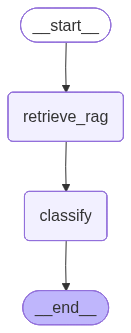

In [ ]:
from langgraph.graph import MessagesState, StateGraph
from typing_extensions import List, TypedDict
from langgraph.graph import START, StateGraph

class State(TypedDict):
    question: str
    context: List[Document]
    masks: List[int]
    probabilities: List[float]

class InputState(TypedDict):
    question: str

class OutputState(TypedDict):
    masks: List[int]
    probabilities: List[float]

# Определить шаги приложения
def retrieve_rag(state: State):
    retrieved_docs = train_vs.similarity_search(state["question"], k=5)
    return {"context": retrieved_docs}

def classify(state: State, threshold=0.545):
    '''
    Использует CatBoostPipeline для бинарного решения
    '''
    # формируем вход для модели
    texts = []
    for doc in state['context']:
      parts = [doc.page_content]
      if doc.metadata.get('summarized'):
        parts.append(doc.metadata['summarized'])

      doc_text = '\n\n'.join(parts)
      texts.append(f'{state["question"]}\n\n{doc_text}')

    # Делаем предсказания
    probas = cb.predict_proba(pd.Series(texts))[:, 1]
    masks = (probas > threshold).astype(int)
    return {"masks": masks, "probabilities": probas}

graph = StateGraph(State, input_schema=InputState, output_schema=OutputState)
graph.add_sequence([retrieve_rag, classify])
graph.add_edge(START, 'retrieve_rag')
graph = graph.compile()
graph


## Что делает агент релевантности (RAG + Classifier)

Агент принимает **пользовательский вопрос** и выполняет следующие шаги:

1. По вопросу выполняется поиск в векторном пространстве (`Vector DB`)
2. Из векторной БД извлекаются `k` документов-кандидатов (в нашем случае `k = 5`)
3. Для **каждого документа независимо** формируется вход:
```
                                        [QUESTION]
                                            +
                                  [DOCUMENT PAGE CONTENT]
                                            +
                              [DOCUMENT METADATA (summarized)]
```

4. CatBoost-классификатор оценивает **релевантность каждого документа**
5. Агент возвращает:

```python
{
 "masks": List[int],          # бинарное решение по каждому документу
 "probabilities": List[float] # вероятности релевантности
}


##  Метрики для оценки агента релевантности

Поскольку агент делает предсказания **по нескольким документам на один вопрос**, классические Precision/Recall нельзя использовать напрямую.  
Мы используем метрики, отражающие **поведение агента на уровне вопроса**, а не отдельного документа.

---

### 1 Acceptance Rate (Доля принятых вопросов)

**Что измеряет:**  
Доля вопросов, для которых агент признал хотя бы один документ релевантным.

**Формула:**
```python
def acceptance_rate(masks):
    accepted = np.any(masks, axis=1)
    return accepted.mean()
```

**Зачем:**

    Показывает, насколько часто агент способен найти хоть один релевантный документ.

    Высокое значение -> агент редко «отказывается» от ответа

    Низкое значение -> агент часто молчит


### 2 Abstain Rate (Доля отказов)

**Что измеряет:**
Доля вопросов, для которых агент не признал ни один документ релевантным.

**Формула:**
```python
Abstain_Rate = 1 - Acceptance_Rate
```

**Зачем:**

    Отражает частоту отказа агента отвечать.

    Важна для настройки fallback-механизмов (например, веб-поиск).

### 3 Abstain_Rate = 1 - Acceptance_Rate

**Что измеряет:**

Вероятность того, что вопрос действительно релевантен при условии, что агент решил на него отвечать.

**Формула**
```python
def question_precision(masks, y_true):
    pred = np.any(masks, axis=1)
    tp = np.sum((pred == 1) & (y_true == 1))
    fp = np.sum((pred == 1) & (y_true == 0))
    return tp / (tp + fp + 1e-9)
```

**Зачем**

    Отражает качество решений агента

    Высокое значение -> агент редко принимает нерелевантные вопросы

In [ ]:
import joblib

y_masks_train, y_probas_train = [], []
y_masks_val, y_probas_val = [], []
y_masks_test, y_probas_test = [], []

# На тренировочных данных
for question in tqdm(train_data['Text'], desc="Train: "):
    state = {'question': question}
    out = graph.invoke(state)
    y_masks_train.append(out['masks'])
    y_probas_train.append(out['probabilities'])

# На валидационных данных
for question in tqdm(val_data['Text'], desc="Val: "):
    state = {'question': question}
    out = graph.invoke(state)
    y_masks_val.append(out['masks'])
    y_probas_val.append(out['probabilities'])

# На тестовых данных
for question in tqdm(test_data['Text'], desc="Test: "):
    state = {'question': question}
    out = graph.invoke(state)
    y_masks_test.append(out['masks'])
    y_probas_test.append(out['probabilities'])

# Сохраняем рузультаты
save_dir = '/content/drive/MyDrive/DLS_PROJECT/AGENT/RESULTS'

joblib.dump(y_masks_train, f'{save_dir}/y_masks_train.pkl')
joblib.dump(y_probas_train, f'{save_dir}/y_probas_train.pkl')

joblib.dump(y_masks_val, f'{save_dir}/y_masks_val.pkl')
joblib.dump(y_probas_val, f'{save_dir}/y_probas_val.pkl')

joblib.dump(y_masks_test, f'{save_dir}/y_masks_test.pkl')
joblib.dump(y_probas_test, f'{save_dir}/y_probas_test.pkl')


Train:   0%|          | 0/29829 [00:00<?, ?it/s]

Val:   0%|          | 0/5265 [00:00<?, ?it/s]

Test:   0%|          | 0/570 [00:00<?, ?it/s]

['/content/drive/MyDrive/DLS_PROJECT/AGENT/RESULTS/y_probas_test.pkl']

Загрузим наши предсказания

**Каждый массив имеет размер** `(n_questions, n_docs)`



In [ ]:
save_dir = '/content/drive/MyDrive/DLS_PROJECT/AGENT/RESULTS'

y_masks_train, y_probas_train = np.array(joblib.load(f'{save_dir}/y_masks_train.pkl')), np.array(joblib.load(f'{save_dir}/y_probas_train.pkl'))
y_masks_val, y_probas_val     = np.array(joblib.load(f'{save_dir}/y_masks_val.pkl')), np.array(joblib.load(f'{save_dir}/y_probas_val.pkl'))
y_masks_test, y_probas_test   = np.array(joblib.load(f'{save_dir}/y_masks_test.pkl')), np.array(joblib.load(f'{save_dir}/y_probas_test.pkl'))


In [ ]:
def acceptance_rate(masks):
  # True, если хотя бы один документ принят
  accepted = np.any(masks, axis=1)
  return accepted.mean()

def abstain_rate(acceptance):
  return 1 - acceptance

def question_precision(masks, y_true):
    pred = np.any(masks, axis=1)
    tp = np.sum((pred == 1) & (y_true == 1))
    fp = np.sum((pred == 1) & (y_true == 0))
    return tp / (tp + fp + 1e-9)

def max_probability(probas):
  # максимум по документам для каждого вопроса
  return probas.max(axis=1)

def mean_probability(probas):
  # среднее по документам для каждого вопроса
  return probas.mean(axis=1)

In [ ]:
ar_train = acceptance_rate(y_masks_train)
ar_val   = acceptance_rate(y_masks_val)
ar_test  = acceptance_rate(y_masks_test)

abstain_train = abstain_rate(ar_train)
abstain_val   = abstain_rate(ar_val)
abstain_test  = abstain_rate(ar_test)

pr_train = question_precision(y_masks_train, train_data['relevance_new'])
pr_val   = question_precision(y_masks_val, val_data['relevance_new'])
pr_test  = question_precision(y_masks_test, test_data['relevance_new'])

max_prob_train = max_probability(y_probas_train)
max_prob_val   = max_probability(y_probas_val)
max_prob_test  = max_probability(y_probas_test)

mean_prob_train = mean_probability(y_probas_train)
mean_prob_val   = mean_probability(y_probas_val)
mean_prob_test  = mean_probability(y_probas_test)

print(f'Acceptance Rate - Train: {ar_train:.3f}, Val: {ar_val:.3f}, Test: {ar_test:.3f}')
print(f'Abstain Rate - Train: {abstain_train:3f}, Val: {abstain_val:.3f}, Test: {abstain_test:.3f}')
print(f'Question precision - Train: {pr_train:.3f}, Val: {pr_val:.3f}, Test: {pr_test:.3f}')


Acceptance Rate - Train: 0.464, Val: 0.465, Test: 0.484
Abstain Rate - Train: 0.536022, Val: 0.535, Test: 0.516
Question precision - Train: 0.701, Val: 0.688, Test: 0.750


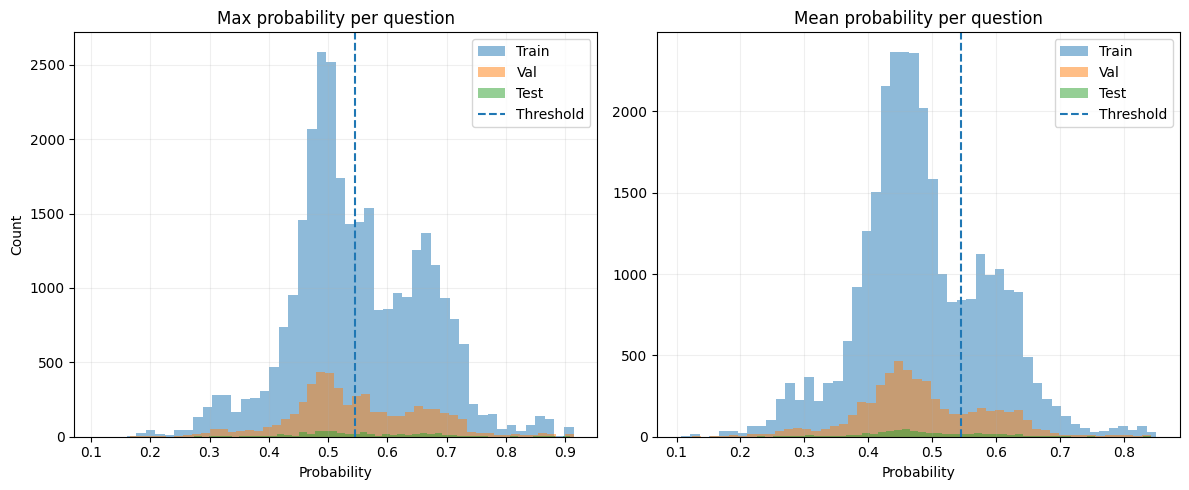

In [ ]:
import matplotlib.pyplot as plt

threshold = 0.545
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Max probability
axes[0].hist(max_prob_train, bins=50, alpha=0.5, label='Train')
axes[0].hist(max_prob_val, bins=50, alpha=0.5, label='Val')
axes[0].hist(max_prob_test, bins=50, alpha=0.5, label='Test')
axes[0].axvline(threshold, linestyle='--', label='Threshold')
axes[0].set_title('Max probability per question')
axes[0].set_xlabel('Probability')
axes[0].set_ylabel('Count')
axes[0].grid(True, alpha=0.2)
axes[0].legend()

# Mean probability
axes[1].hist(mean_prob_train, bins=50, alpha=0.5, label='Train')
axes[1].hist(mean_prob_val, bins=50, alpha=0.5, label='Val')
axes[1].hist(mean_prob_test, bins=50, alpha=0.5, label='Test')
axes[1].axvline(threshold, linestyle='--', label='Threshold')
axes[1].set_title('Mean probability per question')
axes[1].set_xlabel('Probability')
axes[1].grid(True, alpha=0.2)
axes[1].legend()

plt.tight_layout()
plt.show()


## Выводы по текущему состоянию агента релевантности (RAG + Classifier)

На текущем этапе агент представляет собой связку **RAG (FAISS)** + **бинарный классификатор (CatBoost)**,  
который принимает решение о релевантности **на уровне вопроса**, анализируя несколько документов.

---

## Итоговые метрики

### Acceptance Rate (доля вопросов, для которых найден хотя бы один релевантный документ)

| Split | Value |
|------|-------|
| Train | 0.464 |
| Val   | 0.465 |
| Test  | 0.484 |

**Интерпретация:**
- Агент принимает решение отвечать примерно в **46–48% случаев**
- В остальных случаях он **осознанно отказывается** из-за низкой уверенности
- Метрика стабильна на Train / Val / Test → **признаков переобучения нет**

---

### Question Precision (точность на уровне вопроса)

| Split | Value |
|------|-------|
| Train | 0.701 |
| Val   | 0.688 |
| Test  | 0.750 |

**Интерпретация:**
- Если агент **решил принять вопрос** (нашёл ≥1 релевантный документ),
  то в **~70–75% случаев** это действительно релевантный запрос
- Это напрямую отражает настройку классификатора с приоритетом на **precision**
- Более высокое значение на Test, чем на Val, говорит о **хорошей обобщающей способности**

---

## Анализ вероятностей релевантности

По распределениям:
- **Средняя вероятность релевантности** по документам для большинства вопросов лежит в диапазоне **0.40 – 0.65**
- **Максимальная вероятность** по вопросу редко значительно превышает порог 0.545

**Это означает:**
- Модель работает в режиме **умеренной уверенности**, избегая агрессивных решений
- Порог классификации подобран корректно и не приводит к случайным срабатываниям
- Агент скорее откажется, чем даст сомнительный ответ

---



## Попробуем добавит в нашего агента поиск в интеренете

Я собрал данные запрос -> вебпоиск

Разметил данные и подобрал трешхолд для классификатора. Проделанная работа в этом [ноутбуке](https://colab.research.google.com/drive/1jakUtSS6b_zrE5VdXIPTY5Zb48RCp4yS?usp=sharing)

In [ ]:
import os
from google.colab import userdata
from langchain_tavily import TavilySearch

os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_KEY')
tavily = TavilySearch(max_results=5)
tavily

TavilySearch(max_results=5, api_wrapper=TavilySearchAPIWrapper(tavily_api_key=SecretStr('**********'), api_base_url=None))

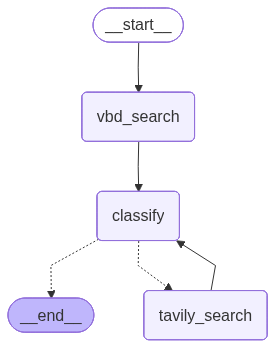

In [ ]:
from langgraph.graph import StateGraph
from typing_extensions import List, TypedDict, Literal
from langgraph.graph import START, StateGraph, END

class State(TypedDict):
    question: str
    context: list
    masks: List[int]
    probabilities: List[float]
    docs: list
    source: str

    used_tavily: bool
    finished_source: str

class InputState(TypedDict):
    question: str

class OutputState(TypedDict):
    masks: List[int]
    probabilities: List[float]
    docs: list

    used_tavily: bool
    finished_source: str

def vbd_pars(state: State):
  '''
  Парсер для документов с векторной базы данных
  '''
  texts = []
  for doc in state['context']:
      parts = [doc.page_content]
      if doc.metadata.get('summarized'):
        parts.append(doc.metadata['summarized'])

      doc_text = '\n\n'.join(parts)
      texts.append(f'{state["question"]}\n\n{doc_text}')
  return texts

def tavily_pars(state: State):
  '''
  Парсер для документов с Tavily
  '''
  texts = []
  for doc in state['context']['results']:
    parts = [doc.get('title')]
    if doc.get('content'):
      parts.append(doc['content'])

    doc_text = '\n\n'.join(parts)
    texts.append(f'{state["question"]}\n\n{doc_text}')

  return texts

def get_pars_documents(state: State):
  '''Возвращает обработанные документы'''
  source = state.get('source')
  return vbd_pars(state) if source == 'VBD' else tavily_pars(state)

# Определить шаги приложения
def vbd_search(state: State):
    docs = train_vs.similarity_search(state['question'], k=5)
    return {"context": docs, 'source': 'VBD', 'used_tavily': False}

def tavily_search(state: State):
    docs = tavily.invoke({'query': state['question']})
    return {"context": docs, 'source': 'Tavily', 'used_tavily': True}

def relevant_documents(state: State, masks: list):
  '''Формирует список релевантных документов на основе масок'''
  source = state.get('source')
  docs = []
  if source == 'VBD':
    for i, mask in enumerate(masks):
      if mask:
        docs.append(state['context'][i])

  else: # Tavily
    for i, mask in enumerate(masks):
      if mask:
        docs.append(state['context']['results'][i])
  return docs

def classify(state: State, thresholds={"VBD": 0.545, "Tavily": 0.176}):
    '''
    Классификация документов с учётом источника
    '''
    source = state.get('source')  # определяем источник документов

    # получаем докумены
    docs = get_pars_documents(state)

    # делаем предсказания
    probas = cb.predict_proba(pd.Series(docs))[:, 1]
    masks = (probas > thresholds[source]).astype(int)

    # Формируем список релевантных документов
    docs = relevant_documents(state, masks)

    return {"masks": masks, "probabilities": probas, 'docs': docs, 'finished_source': source}

def search_node_selection(state: State)->Literal['tavily_search', END]:
    '''Идем в Tavily или заканчиваем поиск'''
    source = state.get('source')
    masks = state.get('masks')

    has_relevant = any(masks)

    if source == 'VBD' and not has_relevant:
       return 'tavily_search'
    return END

graph = StateGraph(State, input_schema=InputState, output_schema=OutputState)
## Определяем узлы
graph.add_node('vbd_search', vbd_search)
graph.add_node('classify', classify)
graph.add_node('tavily_search', tavily_search)

## Определяем ребра
graph.add_edge(START, 'vbd_search')
graph.add_edge('vbd_search', 'classify')
graph.add_conditional_edges('classify', search_node_selection)
graph.add_edge('tavily_search', 'classify')

graph = graph.compile()
graph


In [ ]:
data = val_data.sample(300, random_state=42)
data.relevance_new.value_counts()

,count
relevance_new,
1,185
0,115


In [ ]:
outs = []

for _, row in tqdm(data.iterrows(), desc='Running:', total=len(data)):
  out = graph.invoke({'question': row['Text']})

  accepted = int(len(out['docs']) > 0)
  probs = out.get('probabilities', [])

  outs.append({
      'question': row['Text'],
      'has_answer': int(row['relevance_new']),
      'accepted': accepted,
      'used_tavily': int(out.get("used_tavily", False)),
      'num_docs': len(out['docs']),
      'max_prob': np.max(probs) if len(probs) else 0,
      'min_prob': np.min(probs) if len(probs) else 0,
      'finished_source': out.get('finished_source', '')
      })

df_logs = pd.DataFrame(outs)
df_logs.to_csv('/content/drive/MyDrive/DLS_PROJECT/AGENT/data/df_logs.csv', index=False)

Running::   0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
df_logs = pd.read_csv('/content/drive/MyDrive/DLS_PROJECT/AGENT/data/df_logs.csv')
df_logs.head()

,question,has_answer,accepted,used_tavily,num_docs,max_prob,min_prob,finished_source
0,стейк в ресторане,1,1,0,5,0.646999,0.564291,VBD
1,пивные рестораны москвы,1,1,0,4,0.627743,0.486245,VBD
2,где вкусно и дешево поесть в риме,1,1,0,5,0.858508,0.585950,VBD
3,",fyz",1,1,0,3,0.587480,0.411256,VBD
4,защита по правам потребителя,1,1,0,1,0.590727,0.412171,VBD


## Описание колонок датасета логов агента

Этот датасет содержит **end-to-end логи работы retrieval-агента**.  
Каждая строка соответствует **одному пользовательскому вопросу** и отражает,
как агент принял решение и к какому результату пришёл.

---

### `question`
Текст пользовательского запроса, который был подан на вход агенту.

Пример: 'ресторан с живой музыкой'


Используется как идентификатор примера и вход для агента.

---

### `has_answer`
Ground Truth-метка для вопроса.

- `1` — у вопроса существует корректный ответ
- `0` — у вопроса нет релевантного ответа

Используется как `y_true` при расчёте метрик (Precision / Recall / F1).

---

### `accepted`
Предсказание агента на уровне вопроса.

- `1` — агент принял решение (вернул хотя бы один документ)
- `0` — агент воздержался (ничего не вернул)

Используется как `y_pred` для end-to-end оценки агента.

---

### `used_tavily`
Флаг использования веб-поиска (Tavily).

- `1` — агент использовал веб-поиск
- `0` — агент завершил работу на векторной базе

Позволяет оценивать fallback-логику и стоимость агента.

---

### `num_docs`
Количество документов, возвращённых агентом на финальном шаге.

- `0` — документов нет (abstain)
- `> 0` — найдено хотя бы одно доказательство

Используется для анализа уверенности и ошибок агента.

---

### `max_prob`
Максимальная вероятность релевантности среди всех финальных документов.

Интерпретируется как оценка уверенности агента в лучшем документе.

---

### `min_prob`
Минимальная вероятность релевантности среди финальных документов.

Показывает разброс уверенности внутри принятого решения.

---

### `finished_source`
Источник, на котором агент завершил работу.

- `VBD` — векторная база
- `Tavily` — веб-поиск

Используется для анализа качества источников и decision policy агента.


In [ ]:
y_true = df_logs['has_answer'].values
accepted = df_logs['accepted'].values
used_tavily = df_logs['used_tavily'].values

tp = ((accepted == 1) & (y_true == 1)).sum()
fp = ((accepted == 1) & (y_true == 0)).sum()
fn = ((accepted == 0) & (y_true == 1)).sum()
tn = ((accepted == 0) & (y_true == 0)).sum()

precision = tp / (tp + fp + 1e-9)
recall = tp / (tp + fn + 1e-9)
f1 = 2 * precision * recall / (precision + recall + 1e-9)
accuracy = (tp + tn) / (tp + fp + fn + tn + 1e-9)
acceptance_rate = accepted.mean()
abstain_rate = 1 - acceptance_rate
tavily_call_rate = used_tavily.mean()

print("\t\t\tEnd-to-End Метрики\n")
print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}\n")
print(f"Accuracy: {accuracy:.4f}\n")
print(f"Precision: {precision:.4f}\n")
print(f"Recall: {recall:.4f}\n")
print(f"F1: {f1:.4f}\n")
print(f"Acceptance Rate: {acceptance_rate:.4f}\n")
print(f"Abstain Rate: {abstain_rate:.4f}\n")
print(f"Tavily Call Rate: {tavily_call_rate:.4f}")


			End-to-End Метрики

TP: 185, FP: 115, FN: 0, TN: 0

Accuracy: 0.6167

Precision: 0.6167

Recall: 1.0000

F1: 0.7629

Acceptance Rate: 1.0000

Abstain Rate: 0.0000

Tavily Call Rate: 0.4967


In [ ]:
used_tavily

np.int64(149)

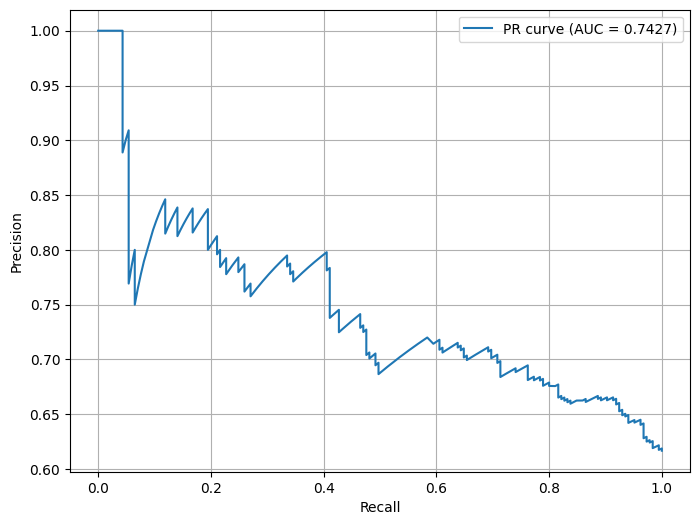

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Берём вероятности максимальной уверенности агента по документам
y_true = df_logs['has_answer'].values
y_scores = df_logs['max_prob'].values  # используем max_prob как score

# Считаем precision, recall
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)
# График PR
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()

# Анализ End-to-End Метрик Агента

**Confusion Matrix:**

- TP (True Positives) = 185 — вопросы с ответом, которые агент нашёл  
- FP (False Positives) = 115 — вопросы без ответа, по которым агент вернул документ  
- FN (False Negatives) = 0 — вопросы с ответом, которые агент пропустил  
- TN (True Negatives) = 0 — вопросы без ответа, которые агент корректно пропустил  

**Accuracy:** 0.6167  
**Precision:** 0.6167  
**Recall:** 1.0000  
**F1:** 0.7629  

**Acceptance Rate:** 1.0000 — агент всегда возвращает документы  
**Abstain Rate:** 0.0000 — агент никогда не воздерживается  
**Tavily Call Rate:** 0.4967 — примерно в половине случаев агент использует веб-поиск  

**PR AUC:** 0.7427 — показатель качества ранжирования документов по вероятности релевантности  

---

##  Интерпретация

- Агент **максимально покрывает вопросы с ответами** (Recall 100%), FN = 0.  
- Precision ~62% — есть ложные срабатывания, FP = 115.  
- F1 = 0.7629 — хороший баланс между покрытием и точностью.  
- Tavily Call Rate ~50% — отражает работу fallback-логики: когда VBD не дал релевантных документов, агент обращается к веб-поиску.  
- PR AUC = 0.7427 — агент хорошо ранжирует документы по релевантности.  


#  Сравнение качества классификатора по источникам

## 1 На данных с векторной базы (VBD)

- **Best threshold:** 0.545  
- **Precision:** 0.750 — высокое качество среди предсказанных релевантных документов  
- **Recall:** 0.413 — классификатор пропускает большую часть релевантных документов  
- **F1:** 0.533 — баланс между Precision и Recall умеренный  
- **ROC AUC:** 0.676 — классификатор неплохо разделяет классы  

**Вывод:**  
Классификатор на VBD **точный, но консервативный**: редко ошибается, но пропускает много релевантных документов.  

---

## 2 На результатах веб-поиска (Tavily)

- **Precision (VAL):** 0.490 — примерно половина предсказанных документов релевантна  
- **Recall (VAL):** 1.000 — классификатор находит все релевантные документы  
- **F1 (VAL):** 0.658 — высокий показатель за счёт максимального Recall  
- **ROC AUC:** 0.471 — разделение классов плохое  

**Вывод:**  
Классификатор на Tavily **очень смелый и чувствительный**: почти все релевантные документы находятся, но много ложных срабатываний.  

---

## Общая интерпретация

- **VBD:** точный, низкий Recall -> хорошо подходит для фильтрации релевантных документов из векторной базы.  
- **Tavily:** высокий Recall, низкий Precision → хорошо для fallback, когда важно не пропустить ответ, но нужно учитывать FP.  
- **F1:** выше на веб-поиске (0.658 > 0.533) за счёт полной чувствительности.  
- **ROC AUC:** классификатор сильнее различает релевантные документы на VBD, слабее на веб-поиске.